In [1]:
#Created by Suvam Biswas
# imported the dataset from the local machine

from google.colab import files
uploaded = files.upload()


Saving balanced_cinnamon_quality_dataset.csv to balanced_cinnamon_quality_dataset.csv


In [3]:
# imported all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# We load and understand the Dta

df = pd.read_csv('balanced_cinnamon_quality_dataset.csv')
print(df.head())
print(df.info())
print(df['Quality_Label'].value_counts())  # Class distribution


  Sample_ID  Moisture (%)  Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0      H001         10.56     5.93              1.24                    0.28   
1      H002         11.43     5.60              1.35                    0.25   
2      H003         11.10     5.70              1.21                    0.37   
3      H004         10.90     5.76              1.47                    0.27   
4      H005         10.23     5.82              1.28                    0.26   

   Chromium (mg/kg)  Coumarin (mg/kg) Quality_Label  
0            0.0019            0.0021          High  
1            0.0016            0.0039          High  
2            0.0013            0.0029          High  
3            0.0011            0.0035          High  
4            0.0013            0.0047          High  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  -----------

In [7]:
# now we encode the labels
label_encoder = LabelEncoder()
df['Quality_Label'] = label_encoder.fit_transform(df['Quality_Label'])


In [12]:
# now we split features and labels

X = df.drop('Quality_Label', axis=1)
y = df['Quality_Label']


In [14]:
#now we normalize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Now the main part started. Train-Test Split

In [15]:
# we succesfully train test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


Now we have to Train a Classification Model (Main Part)

In [16]:
# we Succesfully Trained a Classification Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
#now we evaluate the model

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[4 0 0]
 [0 4 0]
 [0 0 4]]


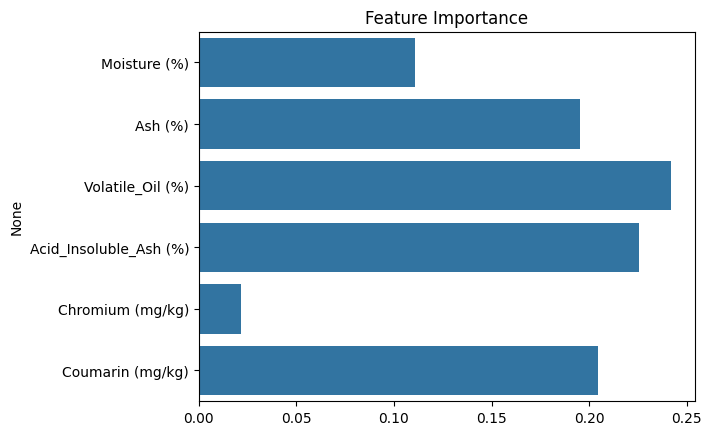

In [18]:
# now lets visualize ieature importance
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


In [19]:
import joblib
joblib.dump(model, 'cinnamon_quality_model.pkl')


['cinnamon_quality_model.pkl']

=====================The End=====================

Extra Tests

In [20]:
#Checking the Accuracy level Is Real or not.
print(confusion_matrix(y_test, y_pred))


[[4 0 0]
 [0 4 0]
 [0 0 4]]


In [21]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy : 1.0


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation accuracy:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


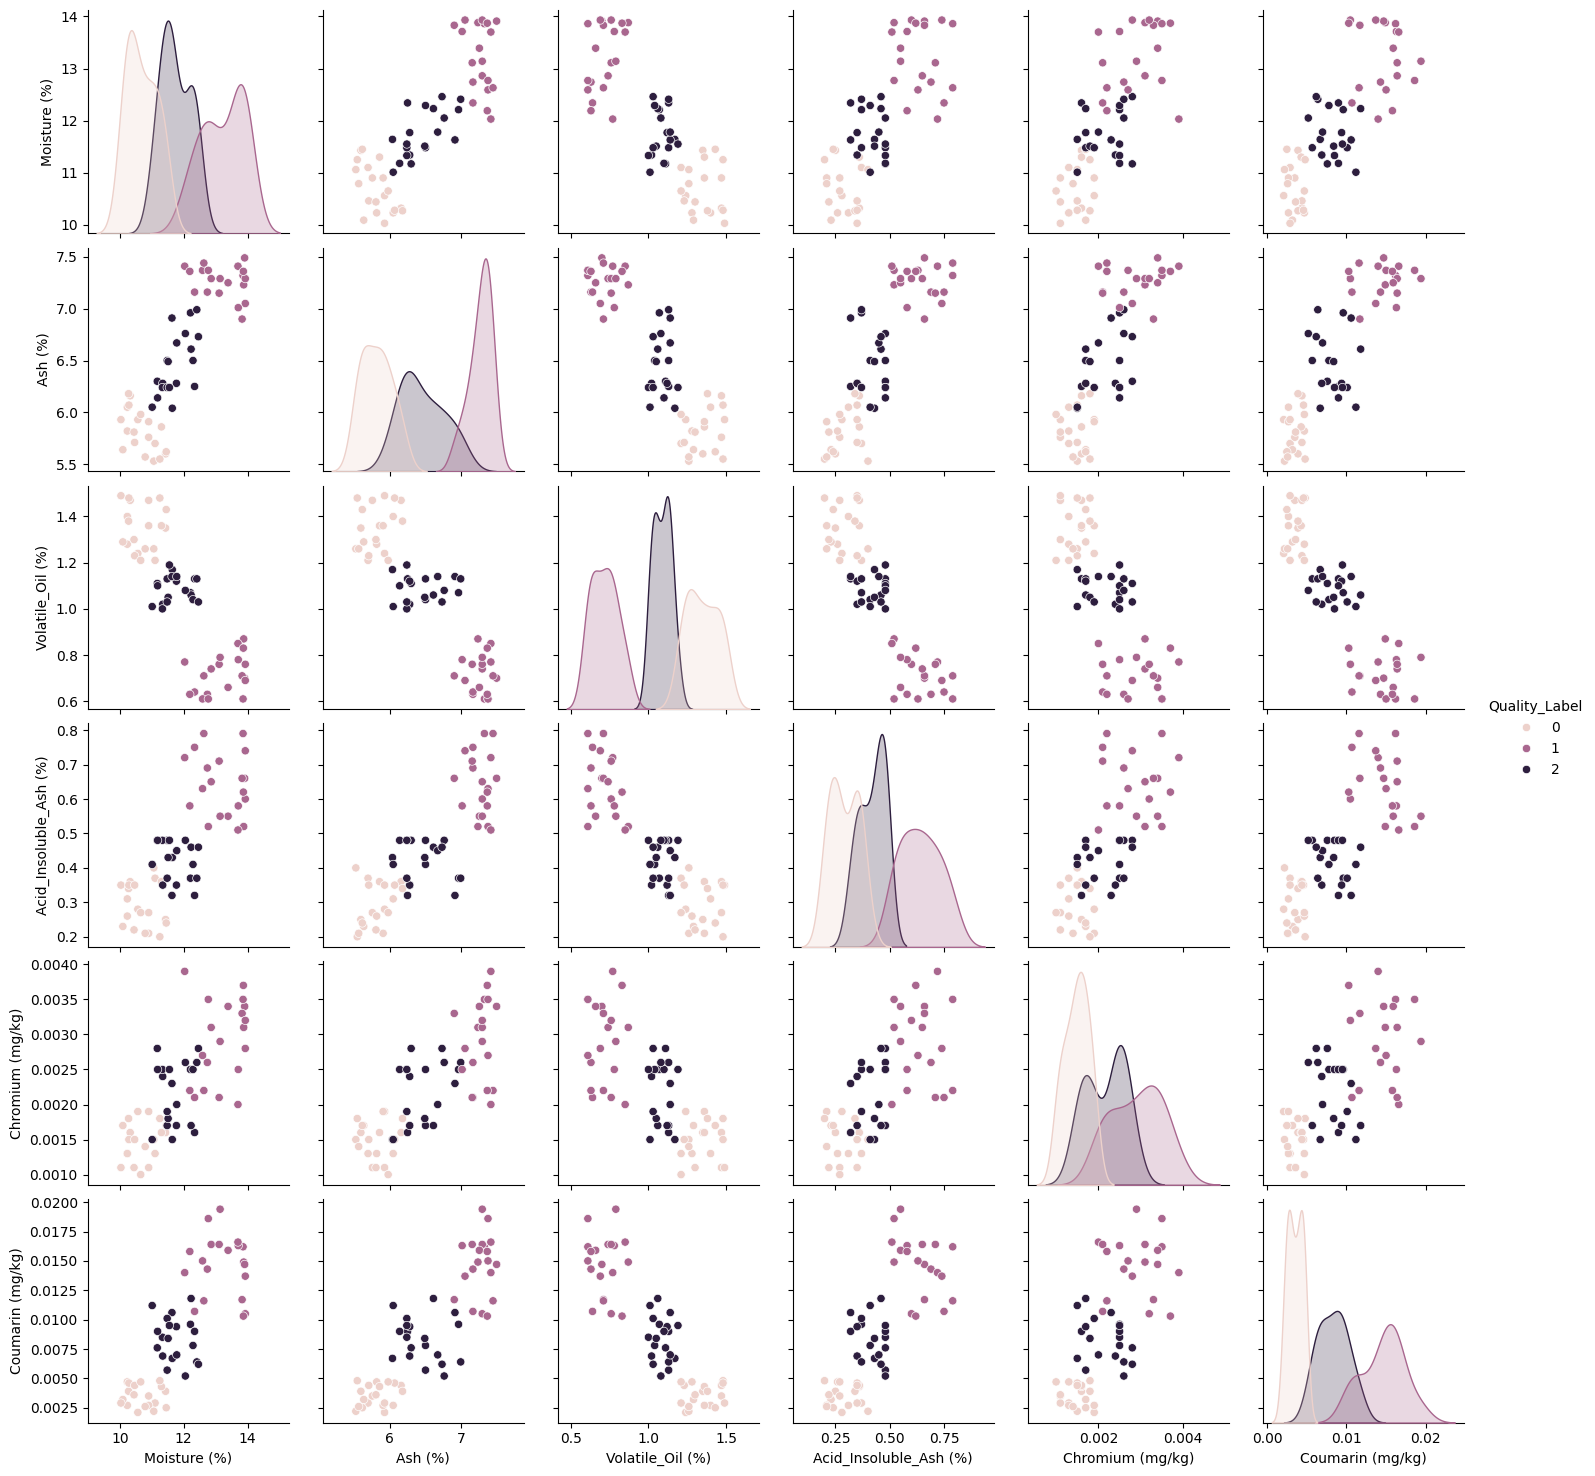

In [23]:
#Visualize features vs quality

import seaborn as sns
sns.pairplot(df, hue='Quality_Label')


In [24]:
#feature importance

importances = model.feature_importances_
for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.4f}")


Moisture (%): 0.1106
Ash (%): 0.1956
Volatile_Oil (%): 0.2422
Acid_Insoluble_Ash (%): 0.2256
Chromium (mg/kg): 0.0217
Coumarin (mg/kg): 0.2044
